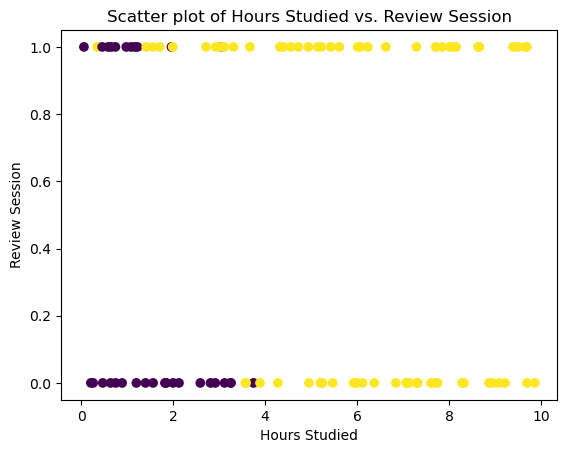

Coefficients: [[1.36499215 1.87733756]]
Intercept: [-4.61182462]
Accuracy: 0.93
ROC AUC: 0.9761029411764706


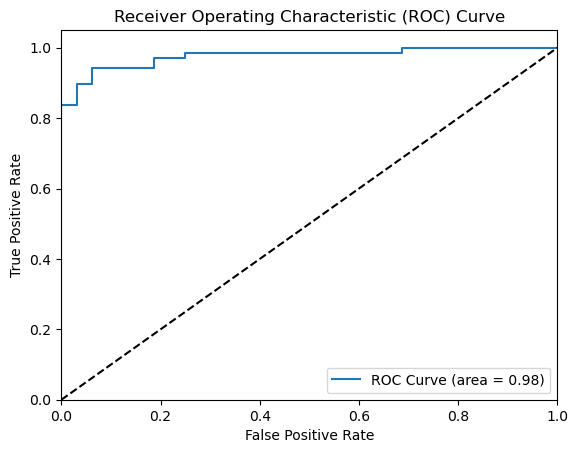

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('student_data.csv')

plt.scatter(data['Hours_Studied'], data['Review_Session'], c=data['Results'], cmap='viridis')
plt.xlabel('Hours Studied')
plt.ylabel('Review Session')
plt.title('Scatter plot of Hours Studied vs. Review Session')
plt.show()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

model = LogisticRegression()

model.fit(X, y)

coefficients = model.coef_
intercept = model.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

y_pred_prob = model.predict_proba(X)[:, 1]
y_pred_class = model.predict(X)

accuracy = accuracy_score(y, y_pred_class)
roc_auc = roc_auc_score(y, y_pred_prob)

print(f'Accuracy: {accuracy}')
print(f'ROC AUC: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
